<a href="https://colab.research.google.com/github/MageshMacpeth/Deep_learning/blob/main/Keras_Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction To Lending Club


In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd
data_info = pd.read_csv('/content/drive/MyDrive/lending_club_info.csv')
data_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis


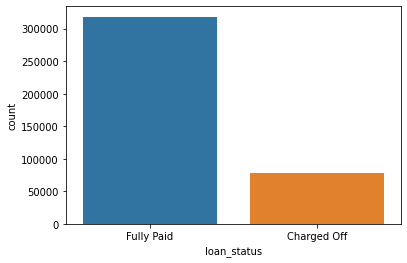

In [98]:
sns.countplot(data=df,x='loan_status')

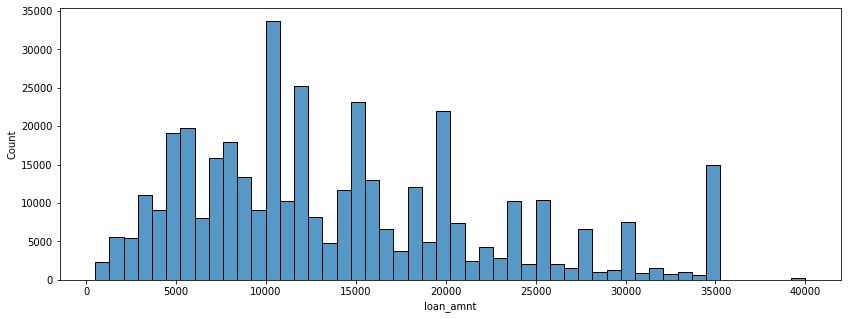

In [99]:
plt.subplots(figsize=(14, 5))
sns.histplot(data=df,x='loan_amnt',bins=50)

In [100]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


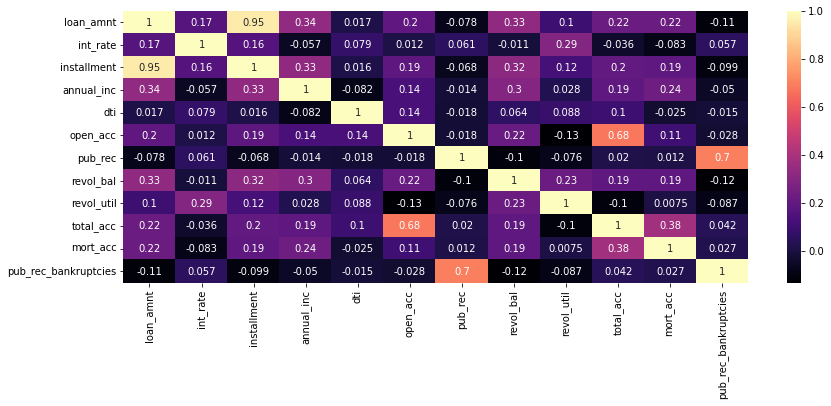

In [101]:
plt.subplots(figsize=(14, 5))
sns.heatmap(df.corr(),annot=True,cmap='magma')


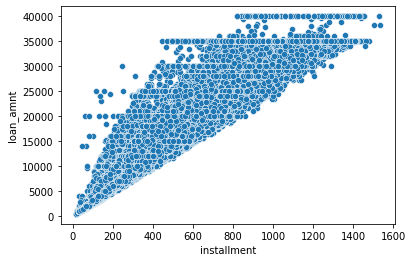

In [102]:
sns.scatterplot(data=df,x='installment',y='loan_amnt')

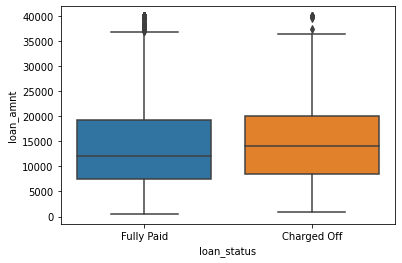

In [103]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

In [104]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


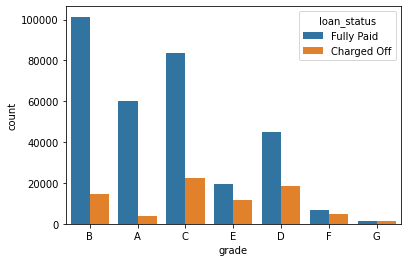

In [105]:
sns.countplot(data=df,x='grade',hue='loan_status')

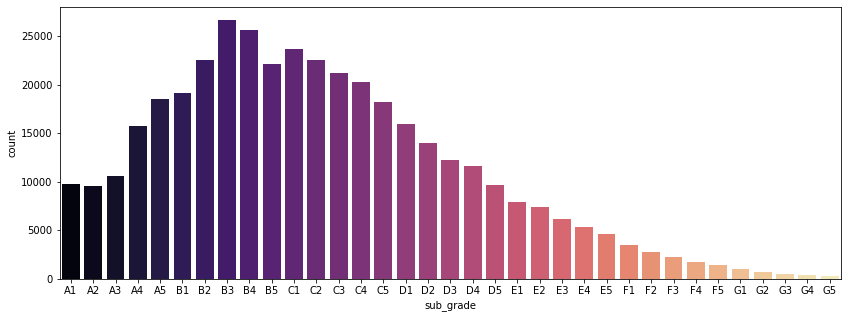

In [106]:
plt.figure(figsize=(14, 5))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='magma')


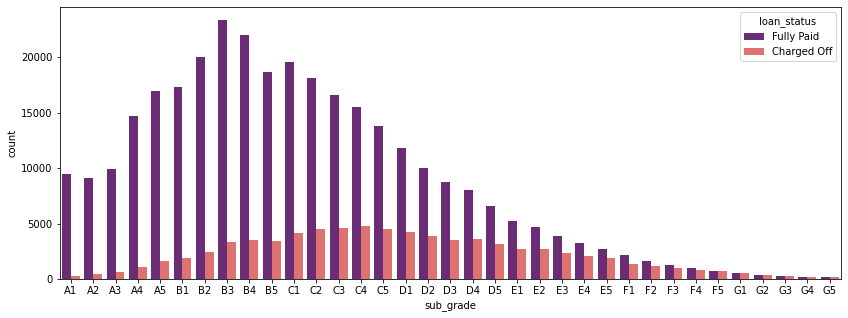

In [107]:
plt.figure(figsize=(14, 5))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='magma',hue='loan_status')


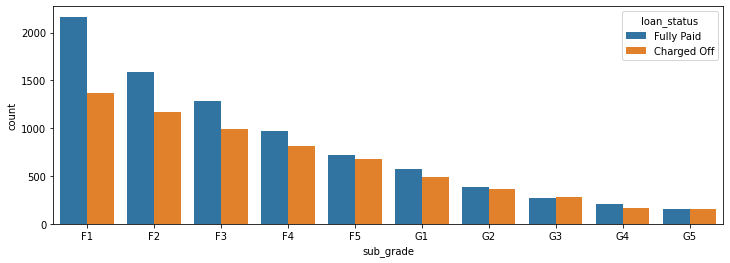

In [108]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')


In [109]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})


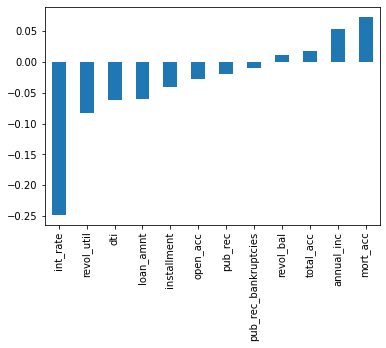

In [110]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


# Section 2: Data PreProcessing


In [111]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [112]:
len(df)

396030

In [113]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [114]:
df['emp_title'].nunique()
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

###### Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.



In [115]:
df=df.drop('emp_title',axis=1)

In [116]:
sorted(df['emp_length'].dropna().unique())
emp_length_order = [ '< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']


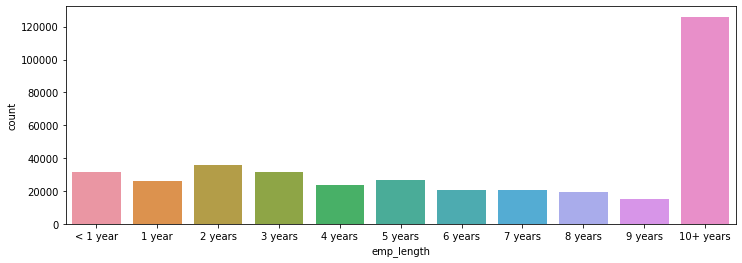

In [117]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='emp_length',order=emp_length_order)

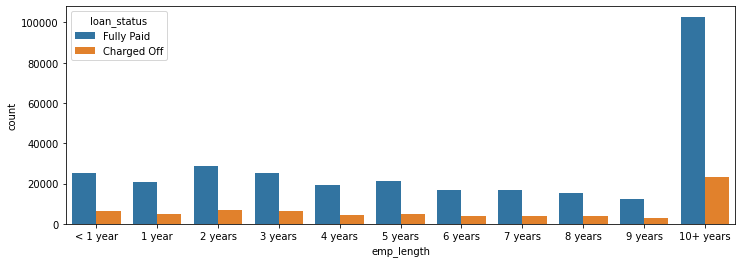

In [118]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='emp_length',order=emp_length_order,hue='loan_status')

In [119]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len=emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

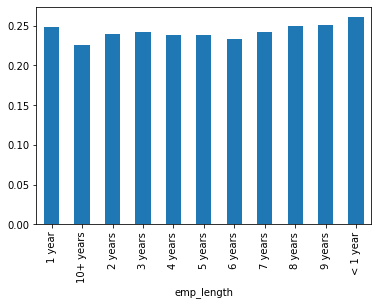

In [120]:
emp_len.plot(kind='bar')

##### Charge off rates are extremely similar across all employment lengths.So you can remove the emp_length column



In [121]:
df = df.drop('emp_length',axis=1)

In [122]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#####  The title column is simply a string subcategory/description of the purpose column.So you can remove the title column.



In [123]:
df = df.drop('title',axis=1)

##### Next is to look for "mort_acc" column. You can either drop that column or fill that with the mean value.




In [124]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [125]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [126]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [127]:
def fill_mort_acc(total_acc,mort_acc):
      if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
      else:
        return mort_acc


In [128]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)


In [129]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

##### Only two columns have missing values which are eventually very less compared to our dataset.So we can drop those rows only.

In [130]:
df = df.dropna()

In [131]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

#### Now move on to categorical data and string data.


In [132]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### term column

In [133]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [134]:
df['term'] = df['term'].apply(lambda term : int(term [:3]))

In [135]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade cloumn is the sub category of sub grade column

In [136]:
df = df.drop('grade',axis=1)

In [137]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

### verification_status, application_type,initial_list_status,purpose


In [138]:
dummies = pd.get_dummies(df[ ['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)
df = pd.concat([df.drop( ['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

### home_ownership


In [139]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [140]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [141]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [142]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [143]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

### address

In [144]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [145]:
df['zip_code'] = df['address'].apply(lambda address : int(address [-5:]))

In [146]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [147]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [148]:
df.columns

Index([                          'loan_amnt',
                                      'term',
                                  'int_rate',
                               'installment',
                                'annual_inc',
                                   'issue_d',
                               'loan_status',
                                       'dti',
                          'earliest_cr_line',
                                  'open_acc',
                                   'pub_rec',
                                 'revol_bal',
                                'revol_util',
                                 'total_acc',
                                  'mort_acc',
                      'pub_rec_bankruptcies',
                                   'address',
                               'loan_repaid',
                                        'A2',
                                        'A3',
                                        'A4',
                                  

In [149]:
df=df.drop('address',axis=1)

### issue_d


In [150]:
df=df.drop('issue_d',axis=1)

### earliest_cr_line

In [151]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda year: int(year[-4:]))

In [152]:
df = df.drop('earliest_cr_line',axis=1)


In [153]:
df = df.drop('loan_status',axis=1)


In [154]:
df.columns

Index([                          'loan_amnt',
                                      'term',
                                  'int_rate',
                               'installment',
                                'annual_inc',
                                       'dti',
                                  'open_acc',
                                   'pub_rec',
                                 'revol_bal',
                                'revol_util',
                                 'total_acc',
                                  'mort_acc',
                      'pub_rec_bankruptcies',
                               'loan_repaid',
                                        'A2',
                                        'A3',
                                        'A4',
                                        'A5',
                                        'B1',
                                        'B2',
                                        'B3',
                                  

### Train Test Split

In [155]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)


### Normalizing the Data


In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train =  scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)


### Creating the Model


In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [158]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))


# hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')


In [159]:
X_train.shape

(316175, 78)

### Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting

In [160]:
model.fit(x=X_train, y=y_train,epochs=25,batch_size=256,validation_data=(X_test, y_test))


Epoch 1/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.3104 - val_loss: 0.2646
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2701 - val_loss: 0.2635
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2680 - val_loss: 0.2632
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2670 - val_loss: 0.2629
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2662 - val_loss: 0.2620
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2661 - val_loss: 0.2624
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2655 - val_loss: 0.2616
Epoch 8/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2650 - val_loss: 0.2618
Epoch 9/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2651 - val_loss: 0.2631
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.264

### Evaluating Model Performance.


In [161]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.310350,0.264610
1,0.270055,0.263477
2,0.267981,0.263168
3,0.266954,0.262919
4,0.266244,0.261998
5,0.266142,0.262364
6,0.265506,0.261613
7,0.265040,0.261765
8,0.265131,0.263147
9,0.264507,0.261541


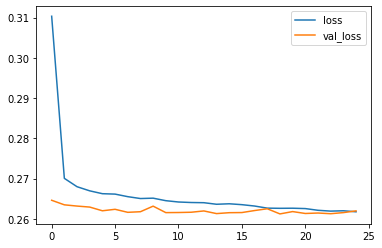

In [162]:
losses[['loss','val_loss']].plot()


In [163]:
from sklearn.metrics import confusion_matrix,classification_report

In [164]:
predictions = (model.predict(X_test) > 0.5).astype("int32")


2471/2471 [==============================] - 3s 1ms/step


In [165]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[ 6726  8932]
 [   11 63375]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044

